In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseValue'] = california.target 

In [3]:
print(df.head())
print(df.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154

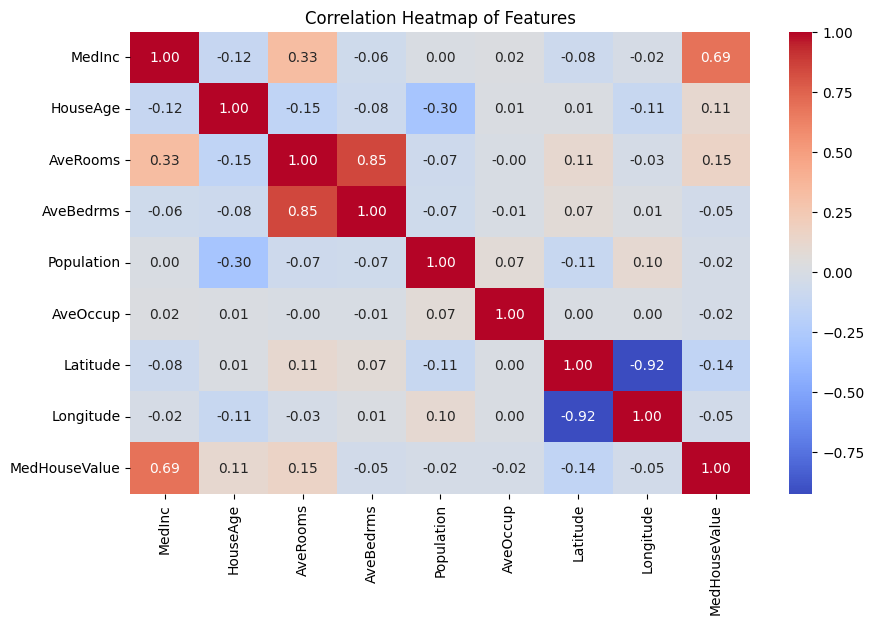

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

In [5]:
X = df.drop("MedHouseValue", axis=1)
y = df["MedHouseValue"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred = model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

Mean Squared Error: 0.556
R² Score: 0.576


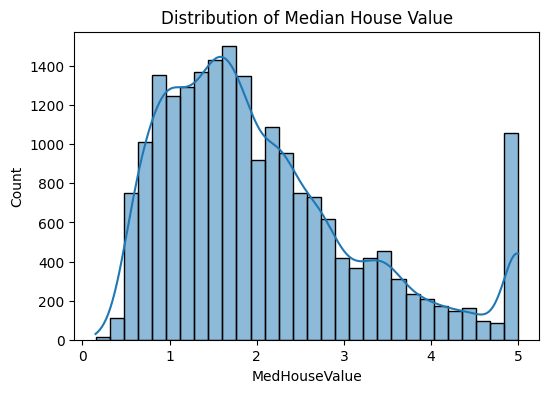

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df["MedHouseValue"], bins=30, kde=True)
plt.title("Distribution of Median House Value")
plt.show()

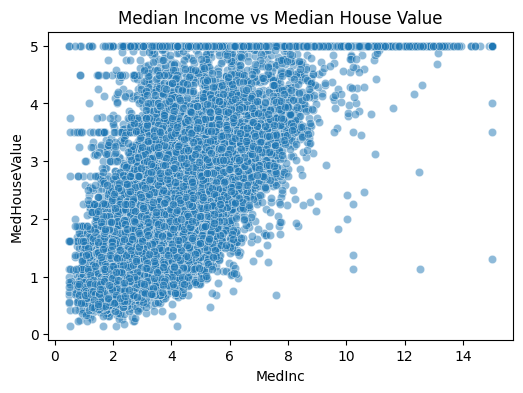

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["MedInc"], y=df["MedHouseValue"], alpha=0.5)
plt.title("Median Income vs Median House Value")
plt.show()

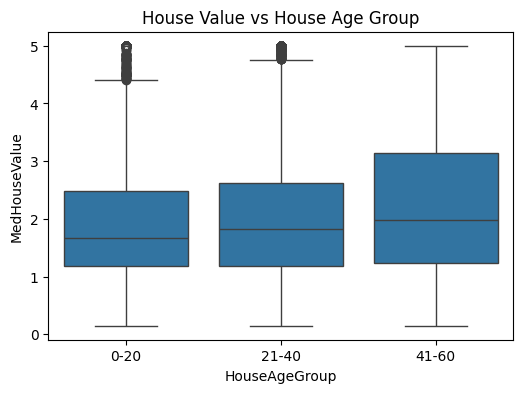

In [12]:
df["HouseAgeGroup"] = pd.cut(df["HouseAge"], bins=[0, 20, 40, 60], labels=["0-20", "21-40", "41-60"])
plt.figure(figsize=(6,4))
sns.boxplot(x="HouseAgeGroup", y="MedHouseValue", data=df)
plt.title("House Value vs House Age Group")
plt.show()